<a href="https://colab.research.google.com/github/mkleach/hello-world/blob/master/Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many NGOs have struggled with balancing their desire to prevent deforestation in the developing world with the reality that hunger is one of the driving forces of new deforestation as land is cleared to make room for agriculture. A more efficient use of already available agricultural plots might decrease the pressure on forest land.

Unlanded farmers need to secure rental plots for cultivation. This search usually takes place entirely by word of mouth and may be unsuccessful. It is not clear to potential renters which owners have extra land. Land owners have no formal way to advertise plots available for rent and are also unsure of their land's worth. Unlanded farmers who cannot secure rental plots may be motivated to clear new plots, thus contributing to deforestation.

Three of the most common land uses include:
*  Corn
*  Sugarcane - requires flat terrain and road access for harvest machinery
*  Pasture - close to habitation preferred (deter theft of livestock) 

There is a need for a simple mobile app that displays satellite images of nearby land. Individual plots could be claimed by their owners and populated with contact data and availability for rental. Users could query neighbors about the ownership of unclaimed plots.

Vegetative indices (NDVI) could predict the avaiability of a plot for rental based on whether it lay fallow the previous season(s). A suitability score could take into account elevation, terrain, proximity to road, etc. to predict which of the three primary uses a plot is best suited for. A suggested rental price could be calculated.

Global Forest Watch data could be displayed to inform users about deforestation occurring in their own communities.


In [0]:
from IPython.display import Image

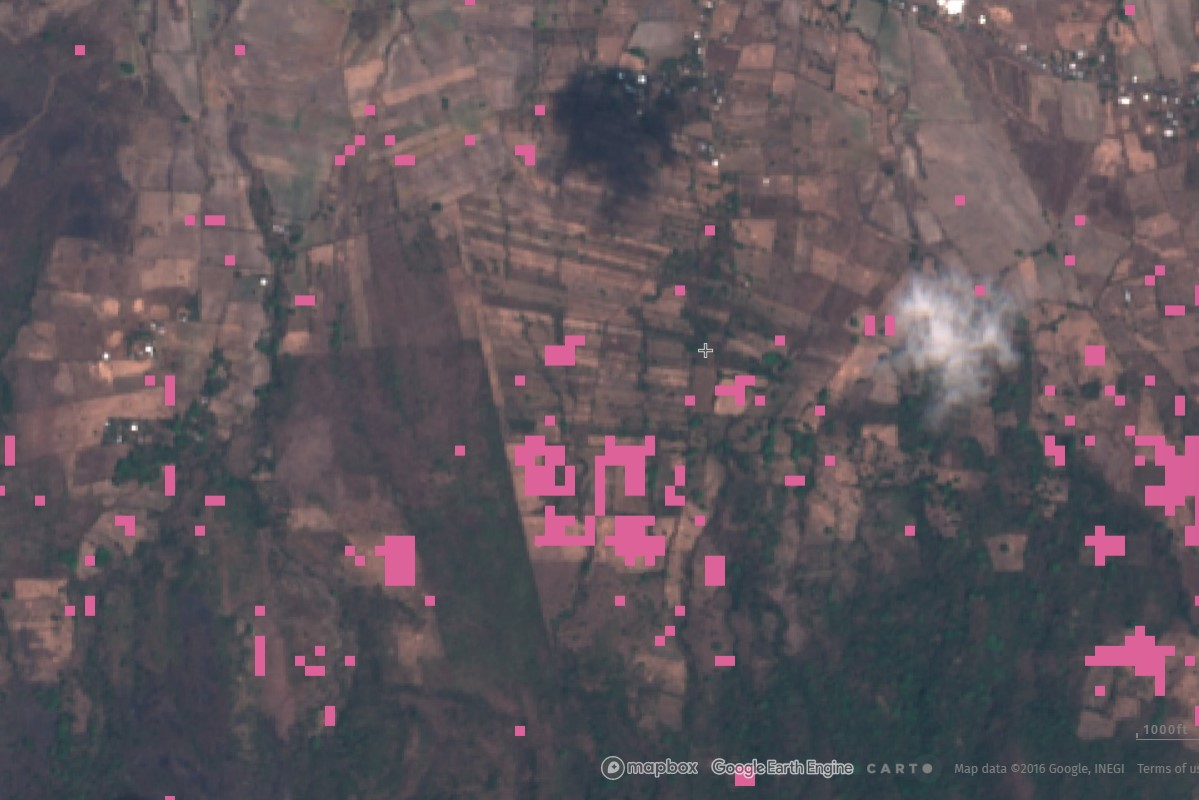

In [2]:
Image('GFW.jpg', height='300')

Global Forest Watch displays recently deforested land (red pixels) near the border of a forest area (bottom of image). Newly cleared land is being used for agriculture.

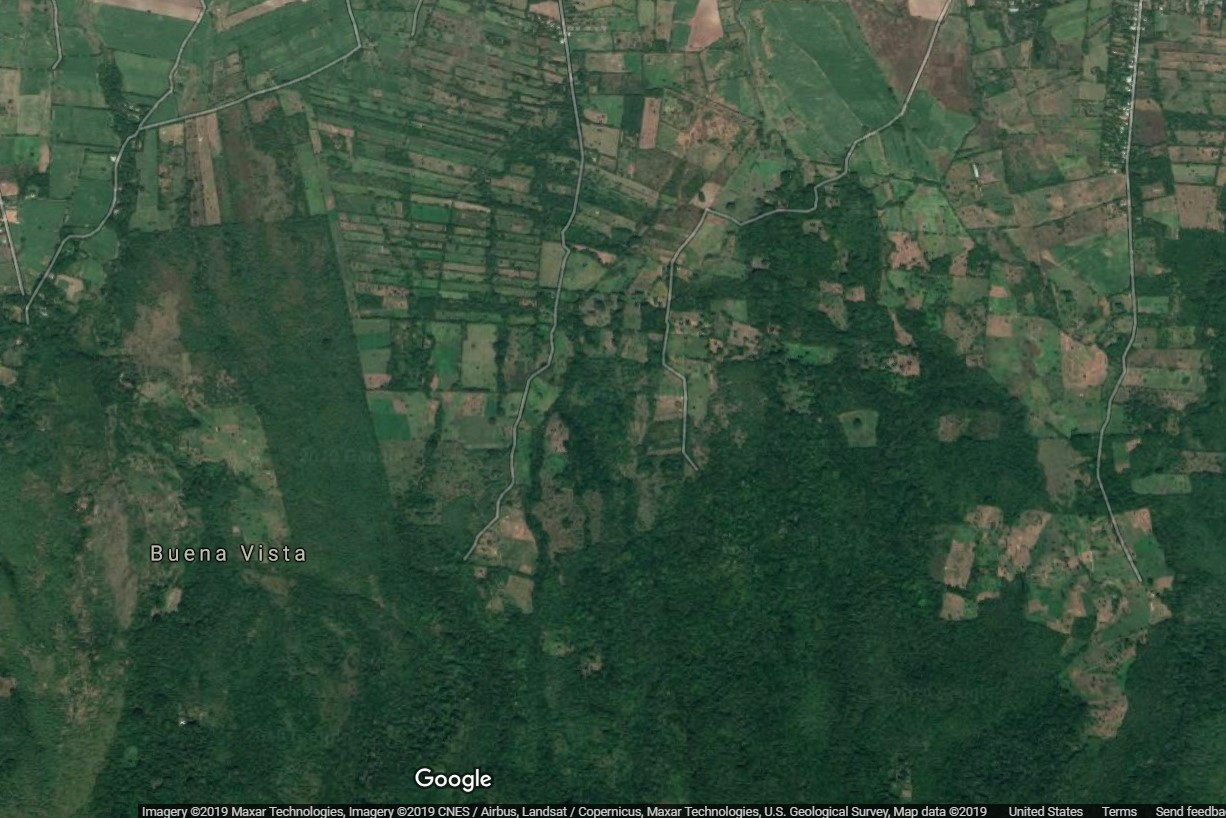

In [3]:
Image('h1.jpg',height='300')

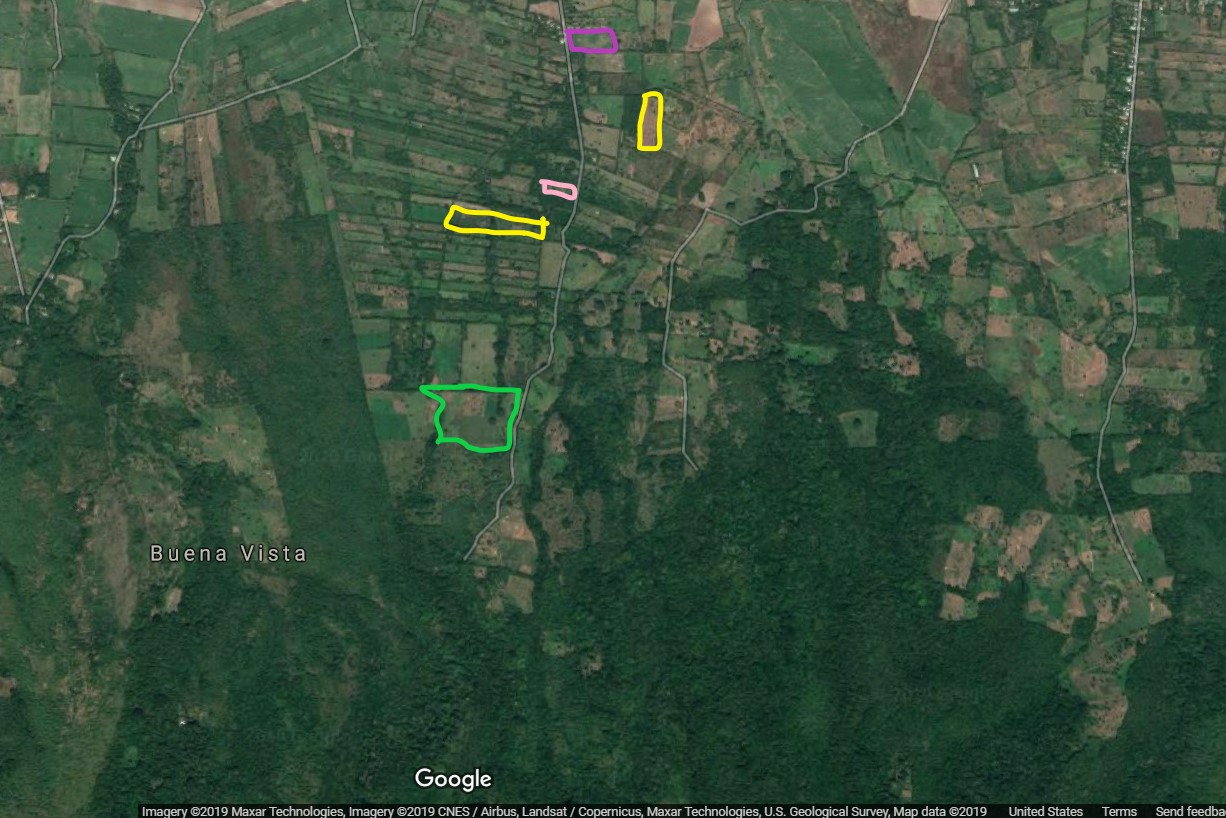

In [4]:
Image('h1marked.jpg',height='300')

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('landplots.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

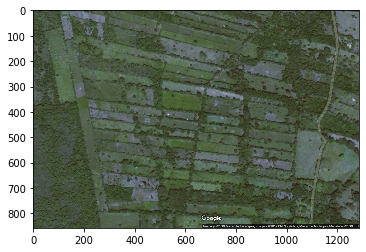

In [6]:
original=img
plt.imshow(original)

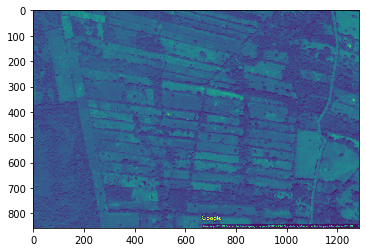

In [7]:
plt.imshow(gray)

In [0]:
kernel = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [0]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

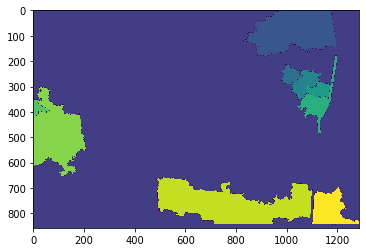

In [48]:
plt.imshow(markers)

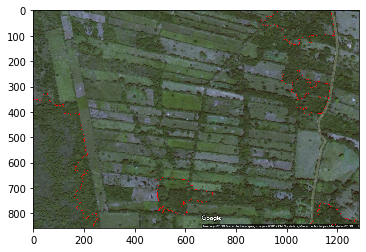

In [12]:
plt.imshow(img)

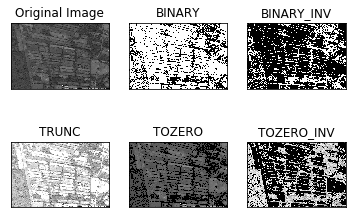

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('graylandplots.png',0)
ret,thresh1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,70,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,70,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,80,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

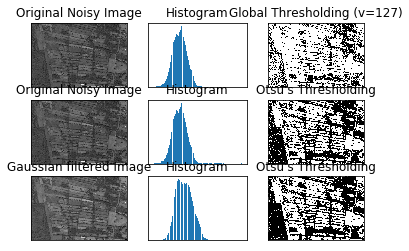

In [42]:
img = cv2.imread('graylandplots.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(7,7),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Amount of veg present in dry season is an indicator of suitability of land for pasture use


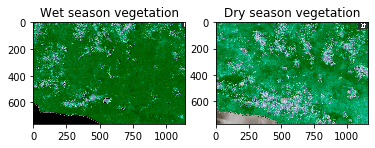

In [58]:
wet = cv2.imread('wet.png')
dry = cv2.imread('dry.png')

plt.subplot(1,2,1),plt.imshow(wet)
plt.title('Wet season vegetation')
plt.subplot(1,2,2),plt.imshow(dry)
plt.title('Dry season vegetation')

print('Amount of veg present in dry season is an indicator of suitability of land for pasture use')